# Laboratorio 02: 

### Intuición estadística modelos de *machine learning*

1. Generar dos distribuciones de probabilidad centradas en 5.0,  7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad. 

  a). Emplear el objeto [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y el metodo *Probability density function* (pdf)

  b) Realizar un gráfico de ambas distribuciones

2.  ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso. 


### Modelo de *machine learning*

3. Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

4. Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 



5. Con los datos anteriores construya un DataFrame con los *features* y *labels* de la siguiente forma:


 |Y(*labels*)         | X_1(*feature*)       |
 |----------|----------|
 |$Y^{1}$ | $X_1^{1}$|
 |$Y^{2}$ | $X_1^{2}$|
 |.         | .        |
 |.         | .        |
 |.         | .        |
 |$Y^{m}$ | $X_1^{m}$  |

- Se sugiere emplear las claves Y, X para los labels y features respectivamente.
- $Y^{1},Y^{2}... Y^{m} $ son los  label de entrenamiento.
- $X_1^{1},X_1^{2}... X_1^{m} $ es el conjunto de datos de entrenamiento asociado a la característica 1 en el entrenamiento m. 
- Este dataframe será el dataset de entrenamiento, para los datos de test construiremos 50 variables aleatorias. 



6. Construye un segundo data frame con 50 datos de test, asociados a las   muestras de  las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves  Y, X_1.

### Modelo de machining learning 
7. Por ahora, emplearemos  clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
  - Definir el modelo y realizar el fit:
  ```
    clf = LinearRegression()
    clf.fit(X_train, Y_train)
  ```
  - Determinar el score de los datos de entrenamiento 
 
  ```
  score = clf.score(X_train, Y_train)
  ```
  - Determinar el score para los datos de test, ¿que puede concluir mirando los scores?

  Nota: 
  Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo. 
  
  ```
    - DecisionTreeClassifier(max_depth=3),
    - SVC(kernel="linear", C=0.025)
  ```

8. Existen librerias que pueden optmizar los hyperparametros de cualquier modelo:   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) prueba a implementar las siguientes lineas de código con el siguiente modelo:

```
from sklearn.model_selection import GridSearchCV

  param_grid = { 
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
  CV_clf.fit(x_train, y_train)
```

9. En los algoritmos de *machining learning* es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal. 

```
title = "Learning Curves"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.5, 1.01),  n_jobs=4
)
```


10. Pruea a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
  - Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2  
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5  
  -¿Qué puede concluir? de cada prueba.


Nota: Busca siempre la manera de construir tus codigos de forma estructurada  de tal forma que puedar variar parametros con facilidad.

----
# 1.
Generar dos distribuciones de probabilidad centradas en 5.0,  7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad. 

  a). Emplear el objeto [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y el metodo *Probability density function* (pdf)

  b) Realizar un gráfico de ambas distribuciones

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [17]:
mean1, mean2 = 5.0, 7.5
desv1, desv2 = 2.5,1.5

x = np.linspace(0,11,100)
dist1, dist2 = norm(loc=mean1,scale=desv1), norm(loc=mean2,scale=desv2)

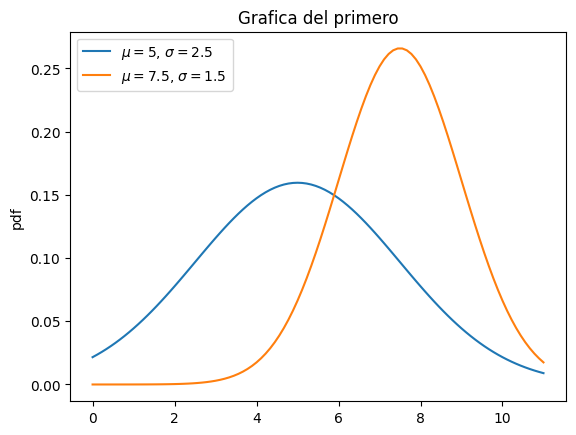

In [21]:
plt.plot(x,dist1.pdf(x), label=r'$\mu=5$, $\sigma=2.5$')
plt.plot(x,dist2.pdf(x), label=r'$\mu=7.5$, $\sigma=1.5$')
plt.title('Grafica del primero')
plt.ylabel('pdf')
plt.legend()
plt.show()

# 2.
¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso. 

Para encontrar los valores de $ x $ tal que $ D_1(x) - D_2(x) = 0 $, asumamos que $ D_1 $ y $ D_2 $ son distribuciones normales con medias $ \mu_1 $ y $ \mu_2 $, y desviaciones estándar $ \sigma_1 $ y $ \sigma_2 $, respectivamente. Las funciones de densidad de probabilidad (PDF) de estas distribuciones normales son:

$$
D_1(x) = \frac{1}{\sigma_1 \sqrt{2\pi}} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}}
$$

$$
D_2(x) = \frac{1}{\sigma_2 \sqrt{2\pi}} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}}
$$

Queremos encontrar los valores de $ x $ tal que:

$$
D_1(x) - D_2(x) = 0
$$

Esto implica que:

$$
\frac{1}{\sigma_1 \sqrt{2\pi}} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} = \frac{1}{\sigma_2 \sqrt{2\pi}} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}}
$$

Primero, eliminamos el término $ \frac{1}{\sqrt{2\pi}} $ de ambos lados:

$$
\frac{1}{\sigma_1} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} = \frac{1}{\sigma_2} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}}
$$

Multiplicamos ambos lados por $ \sigma_1 \sigma_2 $ para simplificar:

$$
\sigma_2 e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} = \sigma_1 e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}}
$$

Tomamos el logaritmo natural de ambos lados para deshacernos de las exponenciales:

$$
\ln(\sigma_2) - \frac{(x - \mu_1)^2}{2\sigma_1^2} = \ln(\sigma_1) - \frac{(x - \mu_2)^2}{2\sigma_2^2}
$$

Reorganizamos los términos:

$$
\frac{(x - \mu_2)^2}{2\sigma_2^2} - \frac{(x - \mu_1)^2}{2\sigma_1^2} = \ln\left(\frac{\sigma_2}{\sigma_1}\right)
$$

Expandimos los cuadrados en ambos términos:

$$
\frac{(x^2 - 2x\mu_2 + \mu_2^2)}{2\sigma_2^2} - \frac{(x^2 - 2x\mu_1 + \mu_1^2)}{2\sigma_1^2} = \ln\left(\frac{\sigma_2}{\sigma_1}\right)
$$

Esto se convierte en:

$$
\frac{x^2}{2\sigma_2^2} - \frac{2x\mu_2}{2\sigma_2^2} + \frac{\mu_2^2}{2\sigma_2^2} - \left( \frac{x^2}{2\sigma_1^2} - \frac{2x\mu_1}{2\sigma_1^2} + \frac{\mu_1^2}{2\sigma_1^2} \right) = \ln\left(\frac{\sigma_2}{\sigma_1}\right)
$$

Agrupamos términos en función de $x^2$, $x$, y las constantes:

$$
\left( \frac{1}{2\sigma_2^2} - \frac{1}{2\sigma_1^2} \right)x^2 + \left( -\frac{\mu_2}{\sigma_2^2} + \frac{\mu_1}{\sigma_1^2} \right)x + \left( \frac{\mu_2^2}{2\sigma_2^2} - \frac{\mu_1^2}{2\sigma_1^2} - \ln\left( \frac{\sigma_2}{\sigma_1} \right) \right) = 0
$$

Por lo tanto, los coeficientes $a$, $b$ y $c$ en la ecuación cuadrática son:

$$
a = \frac{1}{2\sigma_2^2} - \frac{1}{2\sigma_1^2}
$$

$$
b = -\frac{\mu_2}{\sigma_2^2} + \frac{\mu_1}{\sigma_1^2}
$$

$$
c = \frac{\mu_2^2}{2\sigma_2^2} - \frac{\mu_1^2}{2\sigma_1^2} - \ln\left(\frac{\sigma_2}{\sigma_1}\right)
$$

# 3.
Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

In [22]:
data1, data2 = dist1.rvs(size=100), dist2.rvs(size=100)

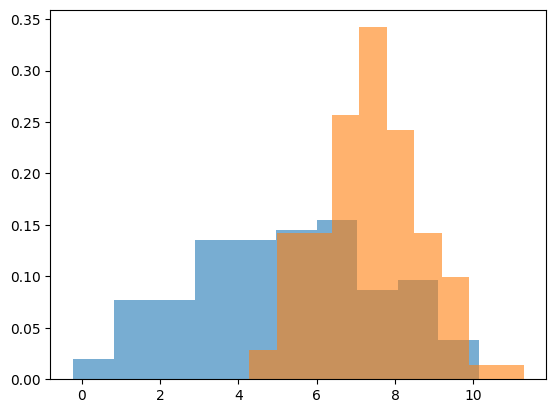

In [30]:
plt.hist(data1, alpha=0.6, density=True)
plt.hist(data2, alpha=0.6, density=True)
plt.show()

# 4.
Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 

In [33]:
x_train = np.concatenate((data1,data2),axis=0)
y_train = np.concatenate((np.zeros(100), np.ones(100)), axis=0)